In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#loading the dataset

In [5]:
df=pd.read_csv(r"C:\Users\nivedhitha\Downloads\TCS_stock_history.csv") 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt;'
import seaborn as sns (#visualize correlation matrices)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm 

In [14]:
df.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
5,2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0
6,2002-08-20,26.563503,28.794168,26.386910,27.111877,3773624,0.0,0.0
7,2002-08-21,28.608262,29.147341,27.158333,28.440964,3011064,0.0,0.0
8,2002-08-22,29.379720,30.913303,29.231009,29.667849,6732480,0.0,0.0
9,2002-08-23,29.928077,32.437575,29.565595,31.452364,4841672,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [17]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [13]:
df.describe()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [8]:
corel=df.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [9]:
# Correlation of features with the target variable (Close Price)
correlation_with_close = df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


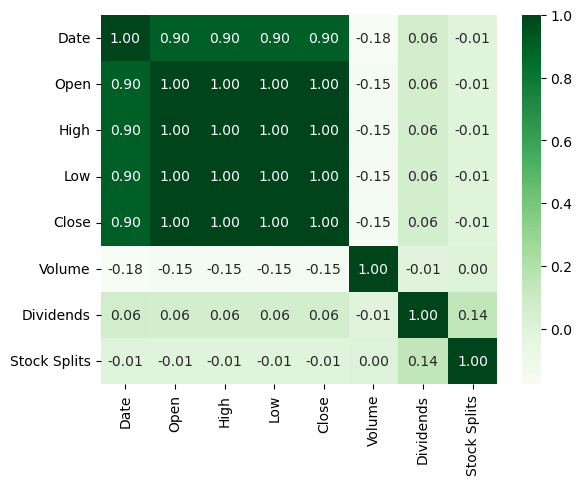

In [10]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()
(#Darker green cells represent higher positive correlations.
#Lighter green or white cells represent weaker correlations or negative correlations)

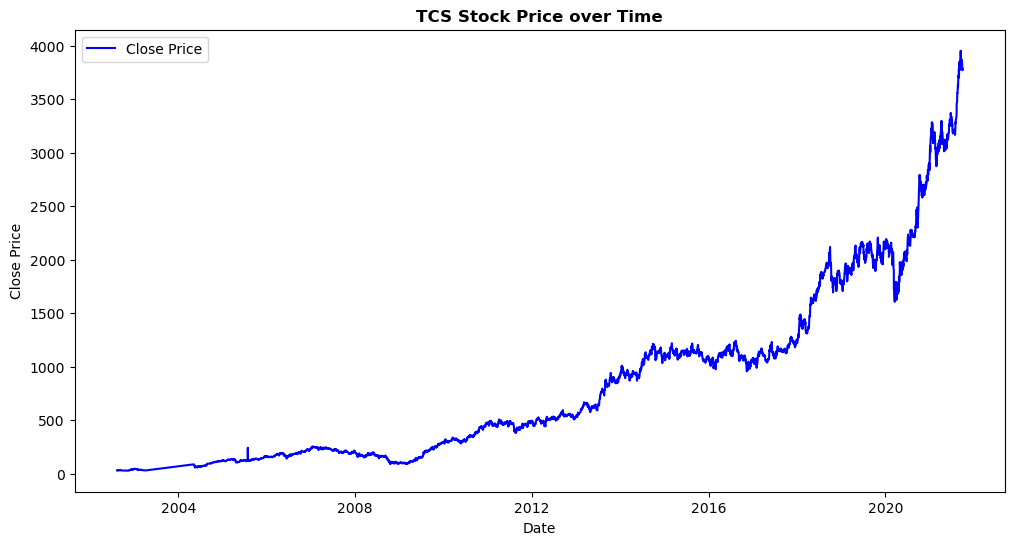

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()  #The blue line represents the stock’s close price over the period, making it easy to observe trends,
#such as whether the price is generally increasing, decreasing, or fluctuating over time.

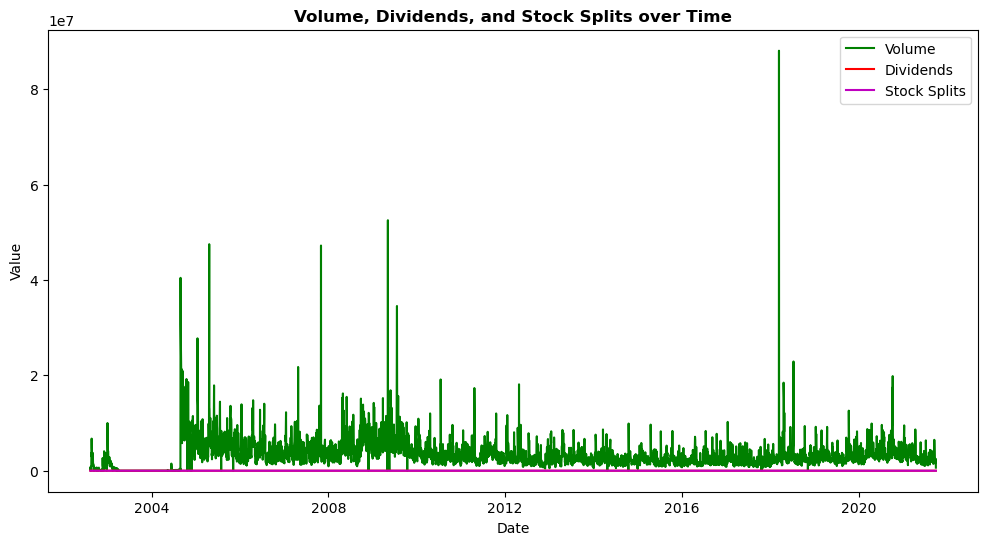

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()
(#comparing these three features on the same graph to observe their relationships over time)

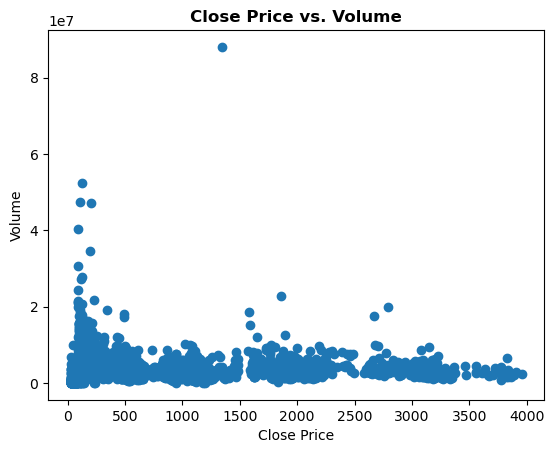

In [13]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show() #Relationship Between Close Price and Volume

(#The scatter plot helps visualize how the stock’s closing price correlates with the trading volume. 
    You can see whether higher prices tend to be associated with higher or lower trading volumes.)`

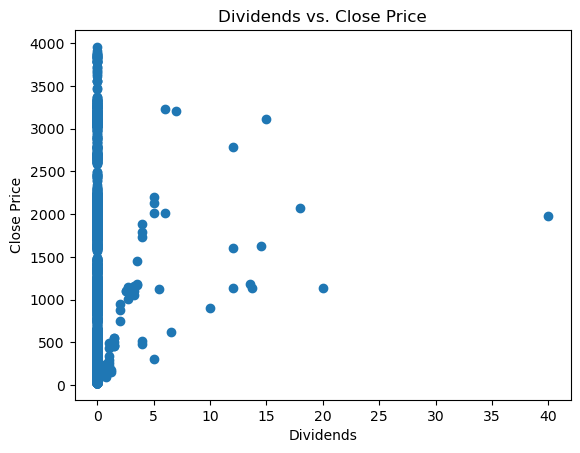

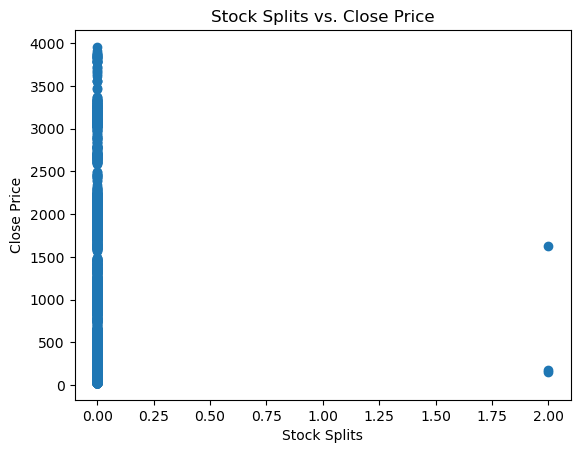

In [14]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()


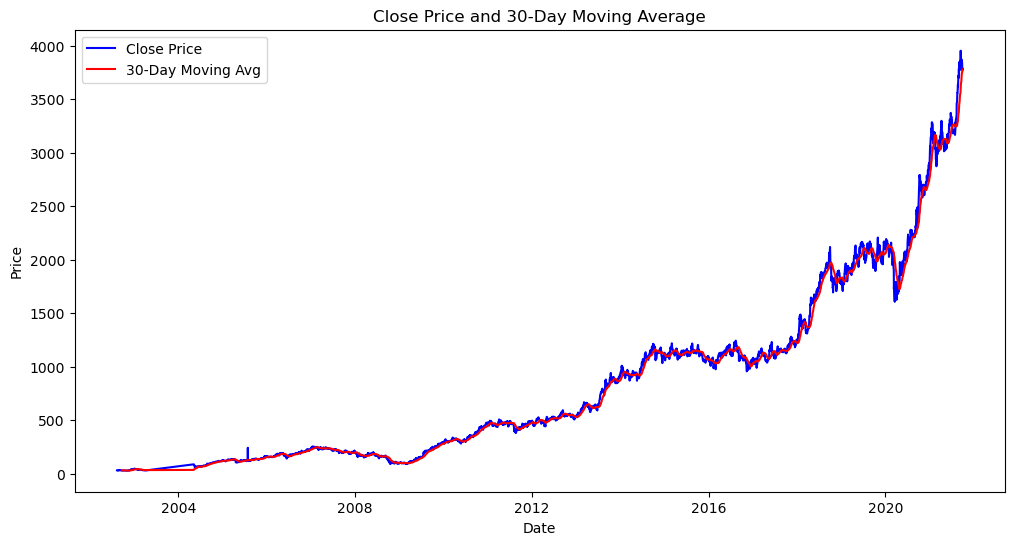

In [15]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()   # if the red line is moving up its the positive trend else it is negative trends


In [17]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [18]:
df['Moving_Avg_Close']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4458    3860.042864
4459    3850.564279
4460    3843.607108
4461    3839.092808
4462    3826.271380
Name: Moving_Avg_Close, Length: 4463, dtype: float64

In [8]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)  # features(input data) 
#CLOSE PRICE IS 1D ARRAY.  USING RESHAPE(-1,1) WILL SHOW 2 DIMENSION.

y_train = df['Close'].shift(-1).dropna().values #target variable
#The shift(-1) function moves each value one row up so that the stock price for day n is now aligned with the price for day n+1.

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # it fit the x_train with in the range of [0,1]

# Define the test data
test_ratio = 0.2    # test data size should 20%
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1) # LSTM models in Keras expect input (samples, timesteps, feature)


In [10]:
X_train

array([[  29.51914024],
       [  29.11947632],
       [  27.11187744],
       ...,
       [3779.14990234],
       [3791.89990234],
       [3773.19995117]])

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
epoch:If your training data has 1000 samples, each epoch will see all 1000 samples once. After 30 epochs, the model will have seen the data 30 times, 
giving it multiple chances to improve its predictions.

batches : If your training data has 1000 samples, with a batch size of 15, the model will process the data in 67 batches (1000 ÷ 15 ≈ 67).
After processing each batch of 15 samples, the model updates its weights. By the time one epoch is complete, the model has updated its weights 67 times.


In [ ]:
# Reshape the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1) # [:-1 there is no next day to predict for the last day.]
y_train_lstm = X_train_scaled[1:] # starting from the second element (index 1) until the end.

In [27]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1))) #The 50 represents the number of units (or neurons) in the LSTM layer. Each unit is a memory cell
model.add(Dense(1)) # This means there is 1 neuron in this layer, and it outputs a single value
model.compile(optimizer='adam', loss='mean_squared_error')    #minimize the loss (error) MSE(Measures how far 
#off the model’s predictions are from the actual stock prices.)

# Set the number of epochs and batch size
epochs = 30   
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

  0%|                                                    | 0/30 [00:00<?, ?it/s]

100%|██████████████████████████████████████| 30/30 [29:53:13<00:00, 3586.44s/it]


In [29]:
lstm_predictions = model.predict(X_test_lstm).flatten() 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [31]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

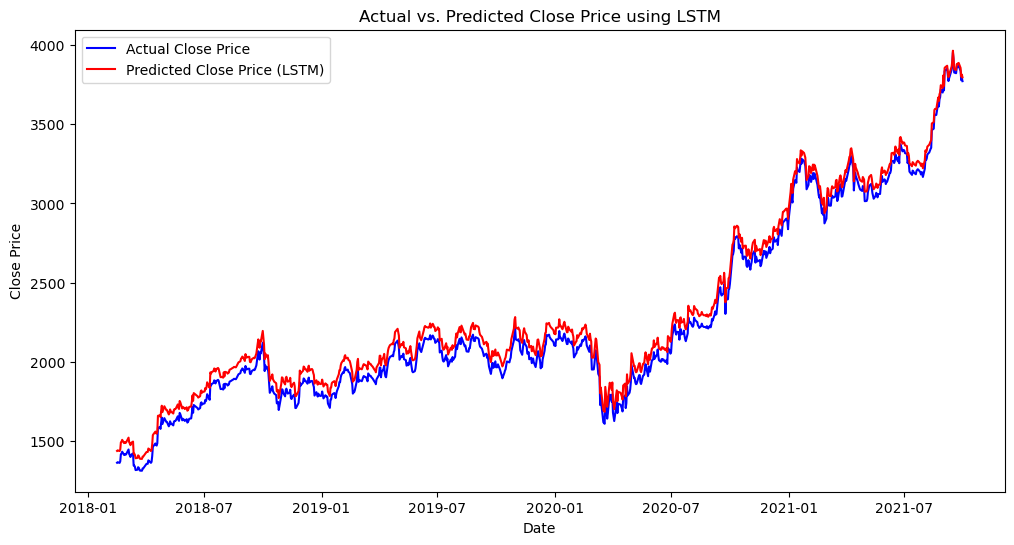

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [35]:
lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 69.22162056824551


In [37]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]  
predictions_df = pd.DataFrame({'Date': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)